<a href="https://colab.research.google.com/github/atalianb/data-science-viii/blob/main/Notebook_she%2B%2B_viii_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenidas al taller de Ciencia de Datos del IWD: She++ VIII ed

Trabajeremos con los datos de [WiDS (Women in Data Science)](https://www.widsworldwide.org/events/event/wids-datathon-2024-equity-in-healthcare/) den Datathon del 2024

Usando un dataset de al rededor de 18k datos (divididos en un set de entrenamiento y un set de pruebas) que representan a pacientes y sus características (raza, edad, BMI, código postal), su diagnóstico y su información del tratamiento (código del diagnóstico de cancer de mama, código del diagnóstico de metástasis, etc), su información geográfica (nivel de código postal), su información demográfica (ingresos, eduación, renta, raza, propiedad, etc), información de la calidad del aire (Ozono, PM25 y NO2) que está relacionada con condiciones ambiantales que impactan a la salud.

Cada renglón corresponde a información de una sola paciente y su diagnóstico. La tarea principal es evaluar si la probabilidad de que el período de diagnóstico de la paciente sea inferior a 90 días, es predecible utilizando estas características e información sobre la paciente.

Covariates

Se usan datos reales proveniente de Health Verity (HV), uno de los ecosistemas más grandes de salud en Estados Unidos. En particular, el dataset usado contiene información de pacientes a quienes se les diagnosticó cáncer de mama triple negativo metastásico en Estados Unidos. Adicionalmente, el conjunto de datos fue enriquecido con información del servicio postal de Estados Unidos (código postal), Census Bureau, National Weather Service, American Community Survey, y the IRS, para obtener información socioeconómica basada en la ubicación de las pacientes. Además utiliza información de la NASA/Columbia University (nivel del código póstal) para explorar relaciones entre la salud y la toxicidad del aire.


Comencemos por conectar el notebook con nuestro Drive

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Carguemos los datos de entrenamiento y prueba

In [2]:
#Importamos librerías importantes para graficar
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd
#Prueba
test = pd.read_csv("/content/drive/MyDrive/data_she++_viii/test.csv")
#Entrenamient
training = pd.read_csv("/content/drive/MyDrive/data_she++_viii/training.csv")

Veamos qué información tienen los datos de entrenamiento

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Explicación de las columnas
* Target: **DiagPeriodL90D** -  Periodo de diagnostico menor a 90 días, nos indica si el cancer fue diagnosticado en un periodo de 90 días

Otras columnas:
* **patient_id** - identificador único del número de paciente
* **patient_race** - Asiatica, Afroamericana, Hispana o Latina, Blanca, otra raza
* **payer_type** - Tipo de pago en Medicaid, Comercial, Medicare en la fecha de metástasis
* **patient_state** - Estado del paciente (e.g. AL, AK, AZ, AR, CA, CO etc…) en la fecha de metástasis
* **patient_zip3** - Paciente Zip3 (e.g. 190) en la fecha de metástasis
* **patient_age** - Derivada del año de nacimiento del paciente(año índice menos año de nacimiento)
* **patient_gender** - F, M en la fecha de metástasis
* **bmi** - Si está disponible, se mostrará la información del BMI (Body Mass Index) disponible (registro del BMI más antiguo posterior a la fecha de metástasis)
* **breast_cancer_diagnosis_code** - ICD10 o ICD9 código de diagnóstico
* **breast_cancer_diagnosis_desc** - ICD10 o ICD9 descripción del código. Esta columna contiene texto sin formato y puede requerir NLP/procesamiento o limpieza
* **metastatic_cancer_diagnosis_code** - ICD10 diagnoses code
* **metastatic_first_novel_treatment** - Nombre genérico del primer tratamiento novedoso (ej. "Cisplatin") trás el diagnostico de metastasis
* **metastatic_first_novel_treatment_type**- Descripción del tratamiento (ej. Antineoplastic) del primer tratamiento novedoso trás el diagnostico de metastasis
* **region**- Región de la ubicación de la paciente.
* **division** - División de la ubicación de la paciente.
* **population** - un estimado del código postal de la población.
* **density** - Estimado de la población por kilómetro cuadrado.
* **age_median** - La edad media de las residentes en el código postal.
* **male** - El porcentaje de habitantes que se tienen registrados como hombres (e.g. 55.1).
* **female** - El porcentaje de habitantes que se tienen registradas como mujeres (ej. 44.9).
* **married** - The percentage of residents who report being married (e.g. 44.9).
* **family_size** - El tamaño promedio de la familia (e.g. 3.22).
* **income_household_median** - Ingreso familiar medio en USD.
* **income_household_six_figure** - Porcentaje de hogares que ganan al menos 100,000 USD (e.g. 25.3)
* **home_ownership** - Porcentanje de hogares que poseen (en lugar de rentar) sus residencias.
* **housing_units** - El número de unidades de vivienda (u hogares) en el código postal.
* **home_value** - El valor medio de las viviendas que son propiedad de los residentes.
* **rent_median** - La renta media que pagan los inquilinos.
* **education_college_or_above** - El porcentaje de residentes con al menos un título universitario de 4 años.
* **labor_force_participation** - El porcentaje de residentes de 16 años o más en la fuerza laboral.
* **unemployment_rate** - El porcentaje de residentes desempleades.
* **race_white** - El porcentaje de residentes que informan que su raza es blanca.
* **race_black** - El porcentaje de residentes que informan que su raza es negra o afroamericana.
* **race_asian** - El porcentaje de residentes que informan que su raza es asiatica.
* **race_native** - El porcentaje de residentes que informan que su raza es India americana y nativa de Alaska.
* **race_pacific** - El porcentaje de residentes que informan que su raza es Natives hawaianes y otres isleñes del Pacífico.
* **race_other** - El porcentaje de residentes que informan que su raza es alguna otra raza.
* **race_multiple - Porcentaje de residentes que informan que su raza es de dos o más razas.
* **hispanic** - Porcentaje de residentes que declaran ser hispanes. Nota: El término hispano se considera una etnia, no una raza.
* **age_under_10** - TPorcentaje de habitantes en el rango de edad 0-9.
* **age_10_to_19** - Porcentaje de habitantes en el rango de edad 10-19.
* **age_20s** - Porcentaje de habitantes en el rango de edad 20-29.
* **age_30s** - Porcentaje de habitantes en el rango de edad 30-39.
* **age_40s** - Porcentaje de habitantes en el rango de edad 40-49.
* **age_50s** - Porcentaje de habitantes en el rango de edad 50-59.
* **age_60s** - Porcentaje de habitantes en el rango de edad 60-69.
* **age_70s** - Porcentaje de habitantes en el rango de edad 70-79.
* **age_over_80** - Porcentaje de habitantes con edad arriba de 80.
* **divorced** - Porcentaje de residentes divorsiades.
* **never_married** - Porcentaje de residentes que nunca se casaron.
* **widowed** - Porcentaje de residentes que nunca enviudaron.
* **family_dual_income** - Porcentaje de familias con dos perceptores de ingresos.
* **income_household_under_5** - Porcentaje de viviendas con ingresos debajo de 5,000 USD.
* **income_household_5_to_10** - Porcentaje de viviendas con ingresos en el rango 5,000 - 10,000 USD.
* **income_household_10_to_15** - Porcentaje de viviendas con ingresos en el rango 10,000 - 15,000 USD.
* **income_household_15_to_20** - Porcentaje de viviendas con ingresos en el rango  15,000 - 20,000 USD.
* **income_household_20_to_25** - Porcentaje de viviendas con ingresos en el rango 20,000 - 25,000 USD.
* **income_household_25_to_35** - Porcentaje de viviendas con ingresos en el rango 25,000 - 35,000 USD.
* **income_household_35_to_50** - Porcentaje de viviendas con ingresos en el rango 35,000- 50,000 USD.
* **income_household_50_to_75** - Porcentaje de viviendas con ingresos en el rango 50,000 - 75,000 USD.
* **income_household_75_to_100** - Porcentaje de viviendas con ingresos en el rango 75,000- 100,000 USD.
* **income_household_100_to_150** - Porcentaje de viviendas con ingresos en el rango 100,000 - 150,000 USD.
* **income_household_150_over** - Porcentaje de viviendas con ingresos arriba de 150,000 USD.
* **income_individual_median** - El ingreso medio de las personas en el código postal.
* **poverty** - El valor medio de las viviendas ocupadas por sus propietarios.
* **rent_burden** - El alquiler medio como porcentaje del ingreso familiar medio del inquilino.
* **education_less_highschool** - Porcentaje de residentes con menor grado de educación que la preparatoria.
* **education_highschool** - Porcentaje de residentes con un certificado de preparatoria pero no más.
* **education_some_college** - Porcentaje de residentes que con carrera trunca.
* **education_bachelors** - Porcentaje de residentes con un título de licenciatura (o equivalente), pero no más.
* **education_graduate** - Porcentaje de residentes con un título de posgrado.
* **education_stem_degree** - El porcentaje de graduades universitarios con una licenciatura o título superior en un campo de ciencias e ingeniería (o relacionado).
* **self_employed** - Porcentaje de hogares que declararon ingresos por cuenta propia en su declaración de impuestos al IRS de 2016.
* **farmer** - Porcentaje de hogares que declararon ingresos agrícolas en su declaración de impuestos al IRS de 2016.
* **disabled** - Porcentaje de habitantes reportados con capacidades diferentes.
* **limited_english** - Porcentaje de habitantes que únicamente pueden hablar inglés limitadamente.
* **commute_time** - Tiempo promedio de los habitantes para llegar al trabajo en minutos.
* **health_uninsured** - Porcentaje de habitantes que son reportados sin seguro médico.
* **veteran** - Porcentaje de habitantes que son veteranos.
* **ozone** - Concentración anual de ozono (O3) en el nivel Zip3 level. Este dato indica como la calidad del aire puede impactar a la salud.
* **PM25** - Concentración anual de partículas finas (Fine Particulate Matter) (PM2.5) en el nivel Zip3. Este dato indica como la calidad del aire puede impactar a la salud.
* **N02** - Concentración anual de Dióxido de (NO2) en el nivel Zip3. Este dato indica como la calidad del aire puede impactar a la salud.

In [5]:
#Información del tipo de dato contenido en la celdas y valores nulos
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

# Estadística descriptiva

In [ ]:
training.patient_gender.value_counts()

,count
patient_gender,
F,12906


In [ ]:
#Completa
#¿Qué otro feature te parece que puede ser importante conocer?

In [6]:
#Descriptive Stats
training.describe(include=object).T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


In [7]:
desc = pd.DataFrame(index = list(training))
desc['type'] = training.dtypes
desc['count'] = training.count()
desc['nunique'] = training.nunique()
desc['%unique'] = desc['nunique'] / len(training) * 100
desc['null'] = training.isnull().sum()
desc['%null'] = desc['null'] / len(training) * 100
desc

,type,count,nunique,%unique,null,%null
patient_id,int64,12906,12906,100.000000,0,0.000000
patient_race,object,6521,5,0.038742,6385,49.473113
payer_type,object,11103,3,0.023245,1803,13.970246
patient_state,object,12855,50,0.387417,51,0.395165
patient_zip3,int64,12906,739,5.726019,0,0.000000
...,...,...,...,...,...,...
veteran,float64,12905,727,5.633039,1,0.007748
Ozone,float64,12877,733,5.679529,29,0.224702
PM25,float64,12877,733,5.679529,29,0.224702
N02,float64,12877,733,5.679529,29,0.224702


## ¿Qué nos dicen las descripciones de arriba?

In [ ]:
#Limpiando datos
#Dropping high nulls columns
for column in training.columns:
    null_count = training[column].isnull().sum()
    percent_nulls = (null_count / training.shape[0]) * 100
    if percent_nulls > 1:
        training.drop(columns = column,axis = 1,inplace=True)
        test.drop(columns = column,axis = 1,inplace=True)

In [ ]:
#Veamos el test dataset
test.head(10)

,patient_id,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,IN,467,54,F,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,Midwest,East North Central,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,FL,337,52,F,C50912,Malignant neoplasm of unspecified site of left...,C787,South,South Atlantic,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,CA,917,61,F,C50911,Malignant neoplasm of unsp site of right femal...,C773,West,Pacific,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,CA,917,64,F,C50912,Malignant neoplasm of unspecified site of left...,C779,West,Pacific,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,CA,900,40,F,C50412,Malig neoplasm of upper-outer quadrant of left...,C779,West,Pacific,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261
5,281312,MI,483,64,F,1748,Malignant neoplasm of other specified sites of...,C7800,Midwest,East North Central,...,4.709804,11.600000,7.454902,2.690196,27.788235,4.488235,5.190196,38.734049,7.935330,21.216445
6,492714,TX,761,91,F,C50912,Malignant neoplasm of unspecified site of left...,C773,South,West South Central,...,36.844444,9.816667,13.814286,7.762857,25.350000,19.061111,5.947222,42.056702,7.645426,18.775051
7,378266,IN,473,79,F,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,Midwest,East North Central,...,2.479661,19.032203,12.837931,0.565517,26.073214,8.664407,8.444068,38.950274,7.675727,15.472591
8,291550,AZ,852,50,F,C50919,Malignant neoplasm of unsp site of unspecified...,C773,West,Mountain,...,17.659091,10.636364,9.520455,1.863636,24.395455,8.584091,7.495455,47.876706,5.956375,22.014931
9,612272,CA,902,47,F,C50412,Malig neoplasm of upper-outer quadrant of left...,C7801,West,Pacific,...,40.000000,8.434286,10.288235,8.267647,29.942857,7.465714,3.140000,41.206093,9.665553,19.714589


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 77 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        5792 non-null   int64  
 1   patient_state                     5771 non-null   object 
 2   patient_zip3                      5792 non-null   int64  
 3   patient_age                       5792 non-null   int64  
 4   patient_gender                    5792 non-null   object 
 5   breast_cancer_diagnosis_code      5792 non-null   object 
 6   breast_cancer_diagnosis_desc      5792 non-null   object 
 7   metastatic_cancer_diagnosis_code  5792 non-null   object 
 8   Region                            5771 non-null   object 
 9   Division                          5771 non-null   object 
 10  population                        5792 non-null   float64
 11  density                           5792 non-null   float64
 12  age_me

In [ ]:
desc = pd.DataFrame(index = list(test))
desc['type'] = test.dtypes
desc['count'] = test.count()
desc['nunique'] = test.nunique()
desc['%unique'] = desc['nunique'] / len(test) * 100
desc['null'] = test.isnull().sum()
desc['%null'] = desc['null'] / len(test) * 100
desc

,type,count,nunique,%unique,null,%null
patient_id,int64,5792,5792,100.000000,0,0.000000
patient_state,object,5771,46,0.794199,21,0.362569
patient_zip3,int64,5792,679,11.723066,0,0.000000
patient_age,int64,5792,67,1.156768,0,0.000000
patient_gender,object,5792,1,0.017265,0,0.000000
...,...,...,...,...,...,...
health_uninsured,float64,5792,672,11.602210,0,0.000000
veteran,float64,5792,669,11.550414,0,0.000000
Ozone,float64,5778,676,11.671271,14,0.241713
PM25,float64,5778,676,11.671271,14,0.241713


In [ ]:
#revisando que el test set y el train set tengan la misma forma
print(f"Train data: {training.shape} \nTest data: {test.shape}")

Train data: (12906, 78) 
Test data: (5792, 77)


# Antes de continuar, ¿Qué otro análisis previo crees que podría funcionar?

<Axes: >

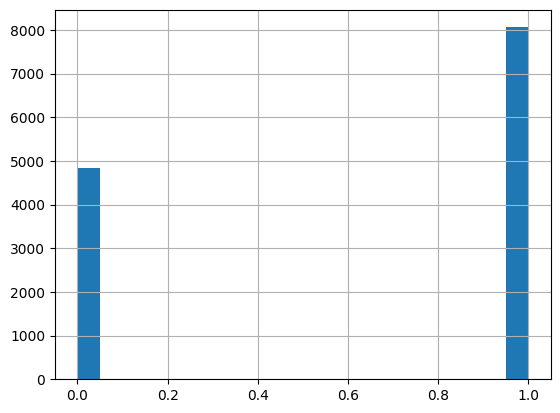

In [ ]:
training['DiagPeriodL90D'].hist(bins=20)

Separemos los datos según su tipo

In [ ]:
numerical_features = list(test._get_numeric_data())
categorical_features = list(test.select_dtypes('object'))
numerical_features,categorical_features

(['patient_id',
  'patient_zip3',
  'patient_age',
  'bmi',
  'population',
  'density',
  'age_median',
  'age_under_10',
  'age_10_to_19',
  'age_20s',
  'age_30s',
  'age_40s',
  'age_50s',
  'age_60s',
  'age_70s',
  'age_over_80',
  'male',
  'female',
  'married',
  'divorced',
  'never_married',
  'widowed',
  'family_size',
  'family_dual_income',
  'income_household_median',
  'income_household_under_5',
  'income_household_5_to_10',
  'income_household_10_to_15',
  'income_household_15_to_20',
  'income_household_20_to_25',
  'income_household_25_to_35',
  'income_household_35_to_50',
  'income_household_50_to_75',
  'income_household_75_to_100',
  'income_household_100_to_150',
  'income_household_150_over',
  'income_household_six_figure',
  'income_individual_median',
  'home_ownership',
  'housing_units',
  'home_value',
  'rent_median',
  'rent_burden',
  'education_less_highschool',
  'education_highschool',
  'education_some_college',
  'education_bachelors',
  'educat

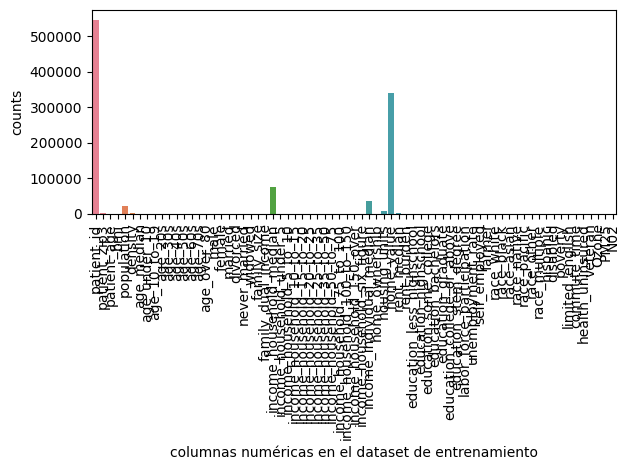

In [ ]:
#Bar plot to see the scale of every numeric feature in the data set
sns.barplot(training[numerical_features],errorbar=None)
plt.xlabel("columnas numéricas en el dataset de entrenamiento")
plt.ylabel("counts")
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
# ¿Qué columnas crees que deberiamos quitar?
#Vuelve a graficar

# Correlación entre variables
Pandas tiene un método para calcular la correlación ([ve la documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html))
en él puedes elegir el método para calcular la correlación entre variables.

Nota: La correlación de Spearman entre dos variables es igual a la correlación de Pearson entre los valores de rango de esas dos variables; mientras que la correlación de Pearson evalúa relaciones lineales, la correlación de Spearman evalúa relaciones monótonas (sean lineales o no). Si no hay valores repetidos en los datos, se produce una correlación de Spearman perfecta de +1 o -1 cuando cada variable es una función monótona perfecta de la otra.

¿Qué método para calcular la correlación elegirías?

In [ ]:
# Completa el código
corr = # Aquí completa la linea
corr

In [ ]:
plt.figure(figsize = (25, 25), dpi = 300)
sns.heatmap(corr, cmap = 'viridis', annot = True, annot_kws = {'size' : 5})
plt.title('Matriz de correlación para el daset de entrenamiento\n', fontsize = 25, weight = 'bold')

El método

```
 triu_indices_from
```
de [numpy](https://numpy.org/doc/2.1/reference/generated/numpy.triu_indices_from.html) selecciona los índices correspondientes a la matriz triangular


In [ ]:
# También podemos añadir una máscara para obtener una matriz triangular
plt.figure(figsize = (25, 25), dpi = 300)
mask =
#Completa

sns.heatmap()
plt.title(' matriz de correlación para el daset de entrenamiento\n', fontsize = 25, weight = 'bold')

In [ ]:
#Intenté hacer esta grafica pero al ser muchos features no se pudo realizar
sns.pairplot(training[numerical_features],diag_kind='kde')

Buffered data was truncated after reaching the output size limit.

### Como ya tenemos separados los datos en entrenamiento y prueba, nos podemos preguntar ¿qué tan diferente es un conjunto de datos respecto del otro?

La validación adversarial es una técnica que se utiliza para comprender las diferencias entre los conjuntos de datos de entrenamiento y de prueba. Implica la creación de un problema de clasificación binaria cuyo objetivo es distinguir entre los datos de entrenamiento y de prueba. Si el modelo puede diferenciarlas fácilmente, indica diferencias significativas.

[Mas información](https://medium.com/@pouyahallaj/adversarial-validation-overcoming-overfitting-1d49c8cb62b9)

In [ ]:
! pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
! pip install xgboost

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from category_encoders import OneHotEncoder, MEstimateEncoder, CatBoostEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBClassifier, XGBRFClassifier
def adversarial_validation(dataset_1=training, dataset_2=test, target=[], label='Train-Test'):
    """
    Realiza validación adversarial para detectar si existen diferencias significativas
    entre los conjuntos de entrenamiento y prueba.

    Parámetros:
    - dataset_1: DataFrame de entrenamiento (por default: training)
    - dataset_2: DataFrame de prueba (por default: test)
    - target: lista de columnas objetivo a excluir de la comparación
    - label: título opcional para los gráficos

    Este método entrena un clasificador para distinguir entre datos de entrenamiento y prueba.
    Si el modelo logra distinguirlos fácilmente (alto AUC), indica que hay un 'data shift' y
    puede afectar la capacidad de generalización.
    """

    # Elimina la columna objetivo del conjunto de entrenamiento
    adv_train = dataset_1.drop(target, axis=1)

    # Copia el conjunto de prueba tal como está
    adv_test = dataset_2.copy()

    # Agrega una columna indicando si una fila proviene del conjunto de prueba (1) o entrenamiento (0)
    adv_train['is_test'] = 0
    adv_test['is_test'] = 1

    # Concatena los datasets en uno solo para entrenar un clasificador binario
    adv = pd.concat([adv_train, adv_test], ignore_index=True)

    # Mezcla aleatoriamente las filas para eliminar sesgos de orden
    adv_shuffled = adv.sample(frac=1)

    # Separa las variables predictoras (X) y la variable a predecir (y)
    adv_X = adv_shuffled.drop('is_test', axis=1)
    adv_y = adv_shuffled.is_test

    # Prepara validación cruzada estratificada (10 particiones)
    skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

    val_scores = []                        # Guardará los AUC por fold
    predictions = np.zeros(len(adv))      # Guardará las predicciones de probabilidad

    # Entrena un clasificador para cada fold
    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        # Clasificador: codifica variables categóricas + modelo XGBoost
        adv_lr = make_pipeline(
            MEstimateEncoder(cols=categorical_features),  # codificación para columnas categóricas
            XGBClassifier(random_state=42)                # modelo de clasificación
        )
        # Entrena con datos de entrenamiento del fold actual
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        # Predice probabilidades sobre el conjunto de validación
        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:, 1]

        # Guarda las predicciones para calcular curva ROC después
        predictions[val_idx] = val_preds

        # Calcula AUC para este fold
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    # Calcula los valores de FPR y TPR para la curva ROC final
    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    # Visualiza la curva ROC
    plt.figure(figsize=(10, 10), dpi=300)
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Conjuntos indistinguibles")
    sns.lineplot(x=fpr, y=tpr, label="Clasificador Validación Adversarial")
    plt.title(f'{label} Validation = {np.mean(val_scores):.5f}', weight='bold', size=17)
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.show()


In [ ]:
adversarial_validation()

# ¿Qué nos indica la gráfica?

La validación adversarial nos indica:
* Si el AUC está cerca de 0.5, los datasets son muy similares.

* Si el AUC es alto (por ejemplo, >0.75), entonces hay un data shift importante entre entrenamiento y prueba, y deberías revisar las variables, codificaciones o la recolección de datos.


# ¿Qué proporción tenemos de prueba y entrenamiento?

# Feature selection (selección de variables significativas)

¿Que te dice tu conocimiento previo?
¿Cuáles crees que sean las variables significativas?

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

corr = # completa
dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')

plt.figure(figsize = (10, 8), dpi = 300)
dendro = dendrogram(dist_linkage, labels=training[numerical_features].columns, leaf_rotation=90)
plt.title(f'Distancia entre variables del dataset de entrenamiento', weight = 'bold', size = 20)
plt.show()

# ¿Qué otra forma se te ocurre para hacer la selección de variables significativas?

# Preparemos los datos para el entrenamiento

In [ ]:
#Limpiando datos
# Para las variables categóricas llenaremos las filas vacias con la moda
for col in categorical_features:
    if col != 'DiagPeriodL90D':
        mode = training[col].mode()[0]
        training[col] = training[col].fillna(mode)
        test[col] = test[col].fillna(mode)

# Para las variables numéricas utlizaremos el promedio para llenar las filas vacías
for col in numerical_features:
    if col != 'DiagPeriodL90D':
        mean = training[col].mean()
        training[col] = training[col].fillna(mean)
        test[col] = test[col].fillna(mean)

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = training.select_dtypes(include=['object', 'category']).columns

le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    training[col] = le.fit_transform(training[col])
    test[col] = le.fit_transform(test[col])

In [ ]:
# Separemos nuestra variable target de las demás variables
X = #completa
y = #completa

In [ ]:
from sklearn.model_selection import train_test_split
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_train,y_val=#completa

## Grid Search CV

El método GridSearchCV de scikit-learn se utiliza para encontrar la mejor combinación de hiperparámetros para un modelo de machine learning. Lo hace evaluando de forma sistemática todas las combinaciones posibles de los valores de hiperparámetros especificados en una “rejilla” (grid) mediante validación cruzada. Por cada combinación, el modelo se entrena y valida usando los datos de entrenamiento, y se calcula una métrica de desempeño (como precisión, AUC, RMSE, etc.). Al final, GridSearchCV devuelve el conjunto de hiperparámetros que obtuvo el mejor rendimiento promedio en los folds de validación, lo que ayuda a mejorar la generalización del modelo.

[Ver documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

#SVM
implementa un clasificador basado en Máquinas de Vectores de Soporte (SVM) para tareas de clasificación supervisada. Este modelo intenta encontrar el hiperplano óptimo que separa las clases de manera que la margen (distancia) entre las clases sea máxima, lo que mejora la capacidad de generalización del modelo. SVC permite el uso de distintos núcleos (kernels) como lineal, polinómico, RBF (radial basis function), y otros, que permiten modelar relaciones no lineales entre las variables.


[Ver documentación](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
# Importamos el escalador estándar para normalizar las características (media = 0, desviación estándar = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Importamos el clasificador SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definimos un conjunto de hiperparámetros que queremos probar (en este caso, kernel RBF, gamma y C específicos)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.001], 'C': [10]}]

# Creamos un modelo SVM y usamos GridSearchCV para encontrar la mejor combinación de hiperparámetros
svclassifier = GridSearchCV(SVC(probability=True), tuned_parameters)

# Entrenamos el modelo con los datos de entrenamiento
svclassifier.fit(X_train, y_train)

# Imprimimos los mejores parámetros encontrados y el puntaje de validación correspondiente
print("The best parameters are %s with a score of %0.2f" % (svclassifier.best_params_, svclassifier.best_score_))

The best parameters are {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} with a score of 0.62


In [ ]:
# Mostramos el rendimiento medio y la desviación estándar de cada combinación evaluada
means = svclassifier.cv_results_['mean_test_score']
stds = svclassifier.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svclassifier.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

0.624 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}



# ¿Qué metricas podemos utilizar para evaluar al modelo?


# 🔍 Métricas de Evaluación de Modelos

## 📊 Métricas para Clasificación

| Métrica                | Descripción                                                                 |
|------------------------|------------------------------------------------------------------------------|
| **Exactitud (Accuracy)** | Proporción de predicciones correctas. Mejor cuando las clases están balanceadas. |
| **Precisión (Precision)** | Verdaderos Positivos / (VP + Falsos Positivos). Útil cuando los FP son costosos. |
| **Recall (Sensibilidad)** | VP / (VP + Falsos Negativos). Importante cuando los FN son costosos.        |
| **F1 Score**           | Media armónica entre precisión y recall. Útil con clases desbalanceadas.    |
| **ROC-AUC**            | Área bajo la curva ROC. Mide la separabilidad entre clases. Más alto es mejor. |
| **PR-AUC**             | Área bajo la curva Precisión-Recall. Excelente para clases desbalanceadas.  |
| **Pérdida Logarítmica (Log Loss)** | Penaliza predicciones erróneas con alta confianza. Menor es mejor.     |
| **Matriz de Confusión** | Tabla con VP, FP, VN, FN. Visualiza los resultados de clasificación.         |

---

## 📈 Métricas para Regresión

| Métrica                | Descripción                                                                 |
|------------------------|------------------------------------------------------------------------------|
| **Error Absoluto Medio (MAE)** | Promedio de los errores absolutos. Fácil de interpretar.                   |
| **Error Cuadrático Medio (MSE)** | Promedio de los errores al cuadrado. Penaliza errores grandes.           |
| **Raíz del Error Cuadrático Medio (RMSE)** | Raíz cuadrada del MSE. Mismas unidades que el objetivo. Sensible a outliers. |
| **R² (Coef. de Determinación)** | Proporción de la varianza explicada por el modelo. 1 es perfecto.         |
| **R² Ajustado**         | R² ajustado al número de predictores. Útil para comparar modelos.            |
| **MAPE (Error Porcentual Absoluto Medio)** | Error en porcentaje. Problemático si los valores reales son cercanos a cero. |

---

## 📝 Tips

- Para **clasificación desbalanceada**, usar **F1**, **ROC-AUC** o **PR-AUC**.
- Para **regresión**, combinar **RMSE** con **R²** da mejor contexto.
- Usa **R² ajustado** para comparar modelos con diferente número de variables.


In [ ]:
# Importamos la métrica F1 Score
from sklearn.metrics import f1_score

# Hacemos predicciones sobre el conjunto de validación
y_pred = #completa

# Calculamos el F1 Score comparando las predicciones con las etiquetas verdaderas
f1 = #completa

# Mostramos el F1 Score obtenido en el conjunto de validación
print("F1 score on test set:", f1)

F1 score on test set: 0.769890424011434


# Probemos diferentes modelos

¿Qué modelos de clasificación conoces?

# SGDClassifier

SGDClassifier es un modelo de clasificación que utiliza el algoritmo de Descenso de Gradiente Estocástico (SGD) para optimizar una función de pérdida de manera eficiente, especialmente en conjuntos de datos grandes o dispersos. A diferencia del descenso de gradiente tradicional, que actualiza los pesos después de procesar todo el conjunto de datos (gradiente por conjunto), SGD actualiza los parámetros del modelo después de ver cada muestra individual, lo que lo hace mucho más rápido y apto para problemas de un gran volumen de datos. El clasificador permite elegir entre distintas funciones de pérdida, como hinge (para SVM) o log_loss (para regresión logística), y admite diferentes tipos de regularización (L1, L2 o ElasticNet) para prevenir el sobreajuste.

Hint: Prueba cambiando los hiperparámetros

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [ ]:
# Clasificador basado en descenso de gradiente estocástico
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import time

# Dividimos los datos en entrenamiento
X_train, X_val, y_train, y_test = train_test_split()#Completa

Hint: Prueba cambiando los hiperparámetros

In [ ]:
# Definimos 4 modelos de regresión logística usando el clasificador SGD con diferentes penalizaciones:
# - Sin regularización
# - Regularización L1 (lasso)
# - Regularización L2 (ridge)
# - Regularización Elastic Net (combinación de L1 y L2)

sgd_model = SGDClassifier(loss='log_loss', penalty=None, max_iter=1000, random_state=42, tol=1e-4)
sgd_l1_model = SGDClassifier(loss='log_loss', penalty='l1', max_iter=1000, random_state=42, tol=1e-4)
sgd_l2_model = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, random_state=42, tol=1e-4)
sgd_elastic_net_model = SGDClassifier(loss='log_loss', penalty='elasticnet', l1_ratio=0.5, max_iter=1000, random_state=42, tol=1e-4)

In [ ]:
# Entrenamos cada modelo y medimos el tiempo que tarda
# Modelo sin regularización
start_time = time.time()
sgd_model.fit(X_train, y_train)
sgd_train_time = time.time() - start_time

# Modelo con L1
start_time = time.time()
sgd_l1_model.fit(X_train, y_train)
sgd_l1_time = time.time() - start_time

# Modelo con L2
start_time = time.time()
sgd_l2_model.fit(X_train, y_train)
sgd_l2_time = time.time() - start_time

# Modelo con Elastic Net
start_time = time.time()
sgd_elastic_net_model.fit(X_train, y_train)
sgd_elastic_net_time = time.time() - start_time

In [ ]:
# Realizamos predicciones sobre el conjunto de validación
sgd_pred = sgd_model.predict(X_val)
sgd_pred_l1 = sgd_l1_model.predict(X_val)
sgd_pred_l2 = sgd_l2_model.predict(X_val)
sgd_pred_elastic_net = sgd_elastic_net_model.predict(X_val)

In [ ]:
# Calculamos la métrica F1 Score para evaluar el rendimiento de los modelos
sgd_accuracy = f1_score(y_test, sgd_pred)
sgd_l1_accuracy = f1_score(y_test, sgd_pred_l1)
sgd_l2_accuracy = f1_score(y_test, sgd_pred_l2)
sgd_elastic_net_accuracy = f1_score(y_test, sgd_pred_elastic_net)

In [ ]:
# Imprimimos los resultados: tiempo de entrenamiento y F1 Score para cada modelo
print("Stochastic Gradient Descent (SGD) results:")
print("Training Time:", sgd_train_time, "seconds")
print("Accuracy:", sgd_accuracy)

print("\nStochastic Gradient Descent l1(SGD) results:")
print("Training Time:", sgd_l1_time, "seconds")
print("Accuracy:", sgd_l1_accuracy)

print("\nStochastic Gradient Descent l2(SGD) results:")
print("Training Time:", sgd_l2_time, "seconds")
print("Accuracy:", sgd_l2_accuracy)

print("\nStochastic Gradient Descent elastic net (SGD) results:")
print("Training Time:", sgd_elastic_net_time, "seconds")
print("Accuracy:", sgd_elastic_net_accuracy)


Stochastic Gradient Descent (SGD) results:
Training Time: 1.1123461723327637 seconds
Accuracy: 0.7701833769945226

Stochastic Gradient Descent l1(SGD) results:
Training Time: 2.892188549041748 seconds
Accuracy: 0.055654233274126705

Stochastic Gradient Descent l2(SGD) results:
Training Time: 1.206214427947998 seconds
Accuracy: 0.7700738622825828

Stochastic Gradient Descent elastic net (SGD) results:
Training Time: 4.338293075561523 seconds
Accuracy: 0.7685693814186768


# CatBooster

CatBoost es un algoritmo de aprendizaje automático basado en boosting de árboles de decisión desarrollado por Yandex, especialmente diseñado para manejar eficientemente características categóricas sin necesidad de codificarlas manualmente (como one-hot o label encoding). Funciona mediante la técnica de gradient boosting, en la que los modelos se entrenan de forma secuencial y cada nuevo árbol intenta corregir los errores cometidos por los árboles anteriores. Una de sus principales innovaciones es el ordenamiento por permutación (ordered boosting), que reduce el sobreajuste común en otros métodos de boosting. Es muy útil en conjuntos de datos heterogéneos con muchas columnas categóricas.

[Documentación](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier)

In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool, cv

Hint: Prueba cambiando los hiperparámetros

In [ ]:
X_train, X_val, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the CatBoost model
model = CatBoostClassifier(iterations=1000,
                            learning_rate=0.2,
                            depth=6,
                            loss_function='Logloss',
                            verbose=200)

In [ ]:
# Train the model
model.fit(X_train, y_train, eval_set=(X_val, y_test), early_stopping_rounds=50)

# Get the best iteration
best_iteration = model.get_best_iteration()

# Make predictions
y_pred = model.predict(X_val)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Best iteration:", best_iteration)
print("F1 score on test set:", f1)

# Veamos qué pasa si combinamos los tres modelos

In [ ]:
# Make predictions for SVM, SGD, and CatBoost models
svm_pred = svclassifier.predict(X_val)
sgd_pred = sgd_l2_model.predict(X_val)
catboost_pred = model.predict(X_val)

f_svm = f1_score(y_test, svm_pred)
f_sgd_pred = f1_score(y_test, sgd_pred)
f_catboost_pred = f1_score(y_test, catboost_pred)
# Combine predictions using averaging
ensemble_pred = (svm_pred + sgd_pred + catboost_pred) / 3

# Convert ensemble_pred to binary values (if needed)
ensemble_pred_binary = np.where(ensemble_pred > 0.5, 1, 0)

# Calculate F1 score for the ensemble predictions
ensemble_f1 = f1_score(y_test, ensemble_pred_binary)

print("F1 score for ensemble learning:", ensemble_f1)

In [ ]:
svm_pred = svclassifier.predict_proba(test)[:, 1]
sgd_pred = sgd_l2_model.predict_proba(test)[:, 1]
catboost_pred = model.predict_proba(test)[:, 1]

¿Qué pasa si cambiamos pas proporciones de cada predicción?

In [ ]:
prediction = 0.6 * catboost_pred + 0.2 * sgd_pred + 0.2 *svm_pred
prediction

In [ ]:
#Grafiquemos los resultados de la predicción
plt.figure(figsize = (15, 10), dpi = 250)
sns.kdeplot(prediction, fill = True)
plt.title("Distribución de probabilidad de DiagPeriodL90D", weight = 'bold', size = 25)
plt.savefig("/content/drive/MyDrive/data_she++_viii/"+'prediction.png',bbox_inches='tight')